In [2]:
import pandas as pd
import matplotlib as plt 
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
%matplotlib notebook
import joblib
from palettable import cmocean as cb
from palettable import tableau as tb
from altair import *
from IPython.display import display,SVG,Image
from collections import Counter
import palettable.colorbrewer as cb

In [3]:
%load_ext Cython

## Get list of 'csv' files

In [4]:
file_list0=glob('instacart_2017_05_01/*.csv')
file_list=[i.split('/')[1] for i in file_list0]

## Import all 'csv' files as Pandas dataframe

In [5]:
for item,path in zip(file_list,file_list0):
    exec('{} = pd.read_csv(\'{}\')'.format(item[:-4],path))


In [4]:
file_list

['orders.csv',
 'departments.csv',
 'order_products__train.csv',
 'aisles.csv',
 'order_products__train_w_dept_id.csv',
 'order_products__prior.csv',
 'products.csv']

In [ ]:
# data_list={}
# for item in file_list:
#     exec('data_list[\'{}\'] = {}'.format(item[:-4],item[:-4]))
    
# data_list.keys()

# joblib.dump(data_list,'All_data_in_dict')
# all_data=joblib.load(filename='All_data_in_dict')

# all_data.keys()

# for i in all_data.keys():
#     #exec('{} = pd.read_csv(\'{}\')'.format(item[:-4],path))
#     exec('{} = all_data[\'{}\']'.format(i,i))

In [6]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
order_products__train_prior=\
pd.concat([order_products__train,order_products__prior],axis=0)

In [9]:
#order_products__train_prior.to_csv('instacart_2017_05_01/order_products__train_prior.csv')

In [199]:
order_products__train_prior[order_products__train_prior.iloc[:,0] ==2539329]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [10]:
def get_hist(col_name):
    hist_hod=pd.DataFrame(col_name.value_counts())
    hist_hod.insert(0,'Name',hist_hod.index)
    hist_hod.reset_index(inplace=True,drop=True)
    return hist_hod
hist_hod=get_hist(orders.order_hour_of_day)
hist_hod.head()

,Name,order_hour_of_day
0,10,288418
1,11,284728
2,15,283639
3,14,283042
4,13,277999


In [11]:
day1=['Sun','Mon','Tue','Wed','Thur','Fri','Sat']
hist_dow=get_hist(orders.order_dow)
hist_dow.insert(1,'Day of Week',day1)
hist_dow.head()

,Name,Day of Week,order_dow
0,0,Sun,600905
1,1,Mon,587478
2,2,Tue,467260
3,5,Wed,453368
4,6,Thur,448761


## Day of Week Plot

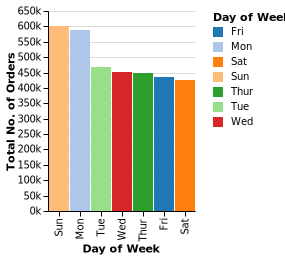

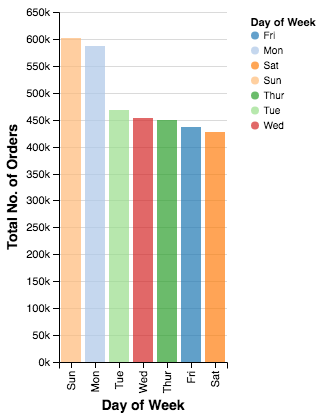

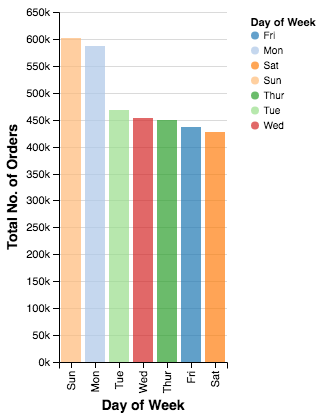

In [8]:
c1=Chart(hist_dow).mark_bar().encode(
    x=X('Day of Week:O',sort=SortField(field='order_dow', order='descending'),
        axis=Axis(title='Day of Week',titleFontSize=14.0)),
    y=Y('order_dow:Q',
        axis=Axis(title='Total No. of Orders',titleFontSize=14.0)),
    color=Color('Day of Week:N', scale=Scale(range=tb.Tableau_20.hex_colors))
)#\
# .configure_cell(
#     width=600,height=200
# )
c1.savechart('Day_of_week1.svg')
c1.display()
SVG('Day_of_week1.svg')

<IPython.core.display.Javascript object>


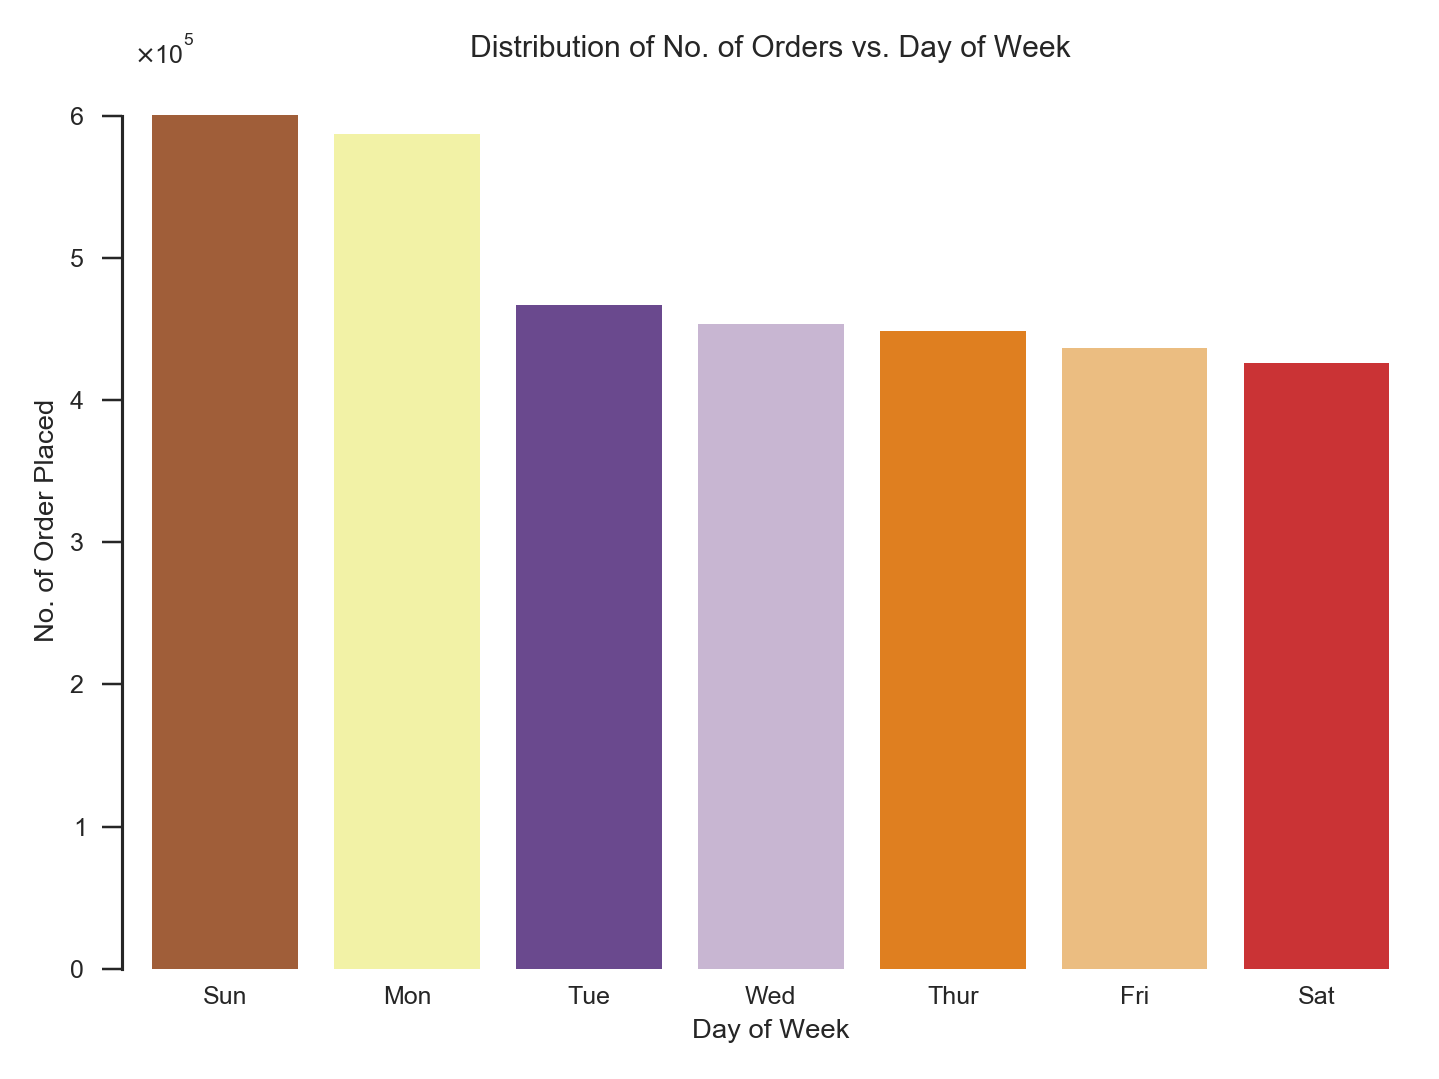

In [16]:
sns.set_style("white",{"xtick.major.size": 0,\
                       'ytick.major.size': 8,\
                       'axes.facecolor':"1"})
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(day1,hist_dow.order_dow.values,\
            palette=cb.qualitative.Paired_12_r.mpl_colors,ax=ax)

sns.despine(ax=ax,top=True,bottom=True,trim=True,offset=5)
plt.title('Distribution of No. of Orders vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No. of Order Placed')
plt.tight_layout()
plt.savefig('Distribution of No. of Orders vs. Day of Week.pdf',transparent=True)

In [10]:
hist_hod.head()

,Name,order_hour_of_day
0,10,288418
1,11,284728
2,15,283639
3,14,283042
4,13,277999


In [ ]:
#!sudo apt install font-manager -y

## Hour of Day Plot

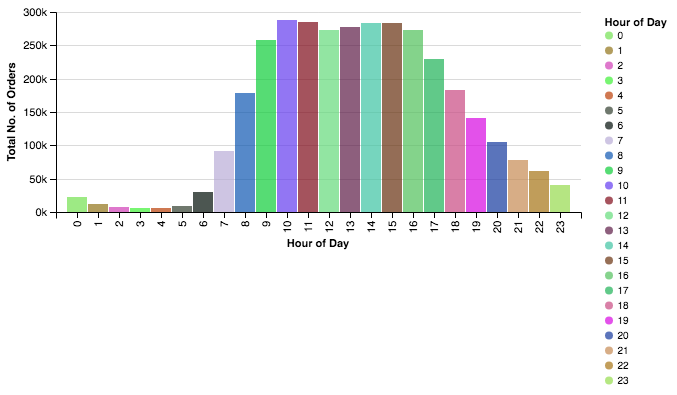

In [16]:

color_list=["#{:06x}".format(np.random.randint(0, 0xFFF0FF)) for i in np.arange(24)]

hist_hod.rename(columns={'Name': 'Hour of Day'},inplace=True)
c=Chart(hist_hod).mark_bar().encode(
    x=X('Hour of Day:O',#sort=SortField(field='order_dow', order='descending'),
        axis=Axis(title='Hour of Day')),
    y=Y('order_hour_of_day:Q',
        axis=Axis(title='Total No. of Orders')),
    color=Color('Hour of Day:N', scale=Scale(range=color_list))
).configure_cell(
    width=600,height=200
)

c.savechart('Hour_of_Day.svg')
#SVG('Hour_of_Day.svg')
c.display()

<IPython.core.display.Javascript object>


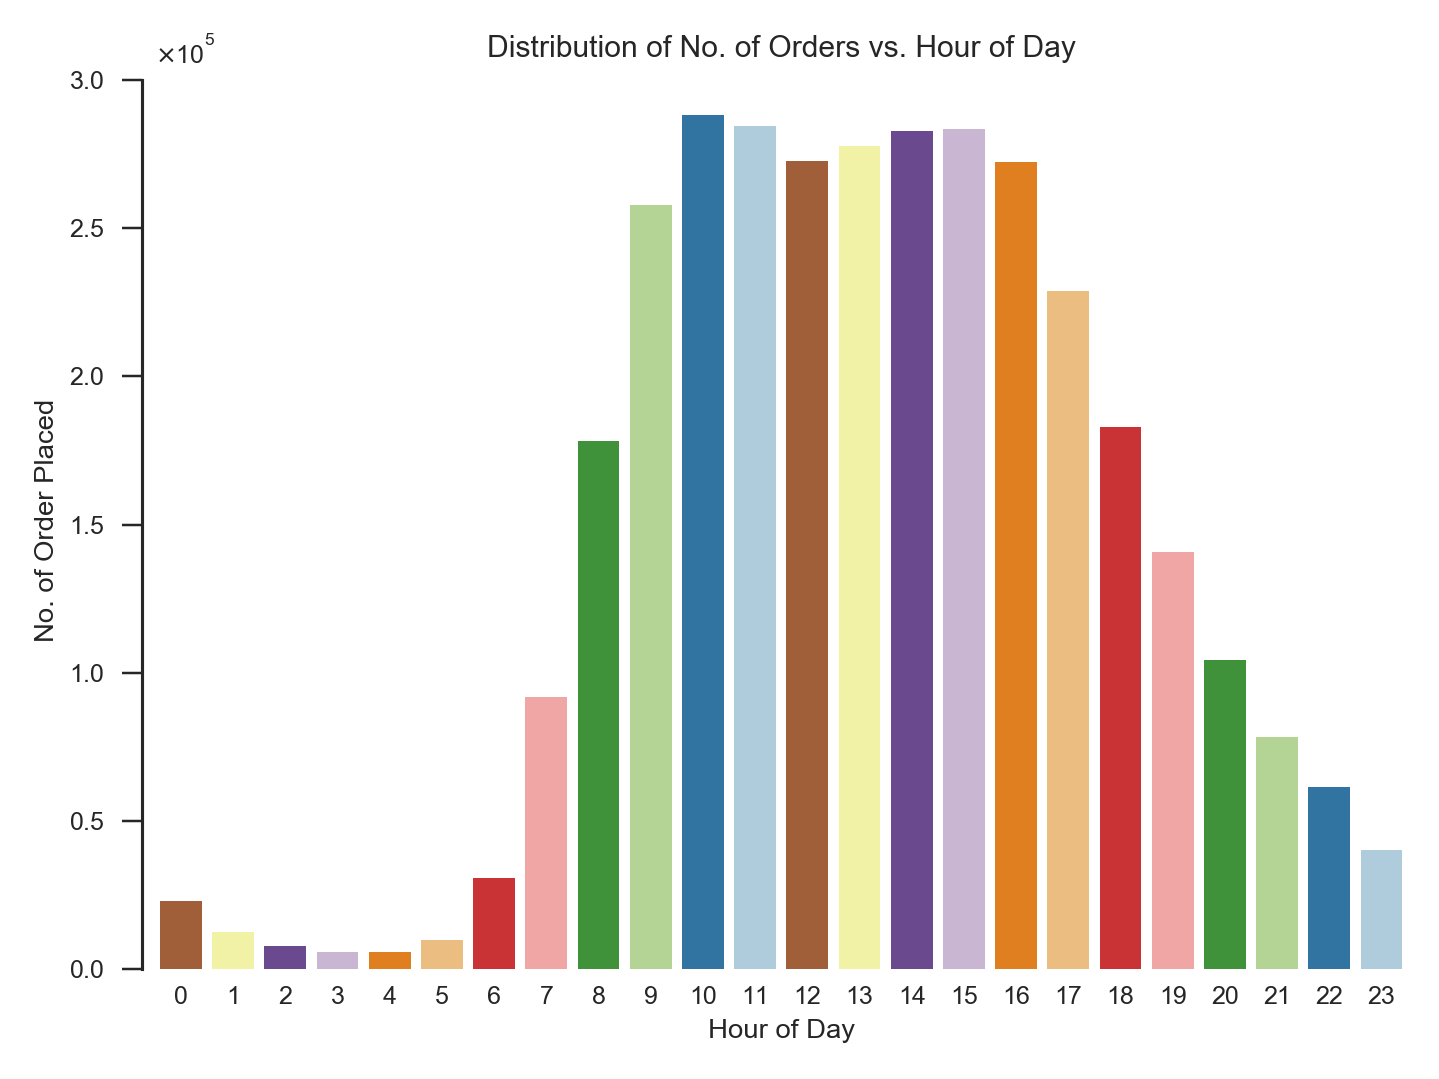

In [17]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(hist_hod.iloc[:,0].values,hist_hod.order_hour_of_day.values,\
            palette=cb.qualitative.Paired_12_r.mpl_colors,ax=ax)
plt.title('Distribution of No. of Orders vs. Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('No. of Order Placed')
sns.despine(ax=ax,top=True,bottom=True,trim=True,offset=5)
plt.tight_layout()
plt.savefig('Distribution of No. of Orders vs. Hour of Day.pdf',transparent=True)

In [18]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [19]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [20]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [21]:
hist_product=get_hist(order_products__train.product_id)

hist_product.head()

,Name,product_id
0,24852,18726
1,13176,15480
2,21137,10894
3,21903,9784
4,47626,8135


In [22]:
# plt.figure()
# g=sns.barplot(hist_product.Name.values[:10],hist_product.product_id.values[:10])
# plt.xticks(rotation=90)
# plt.tight_layout()

In [23]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [24]:
top15_product=[]
for i in hist_product.Name.values[:15]:
    top15_product.extend(products[products.loc[:,'product_id'] == i]['product_name'].values)
    

In [25]:
hist_product15=pd.DataFrame.copy(hist_product.loc[:14,:])
hist_product15['Product_Name']=top15_product


## Most Popular Product

<IPython.core.display.Javascript object>


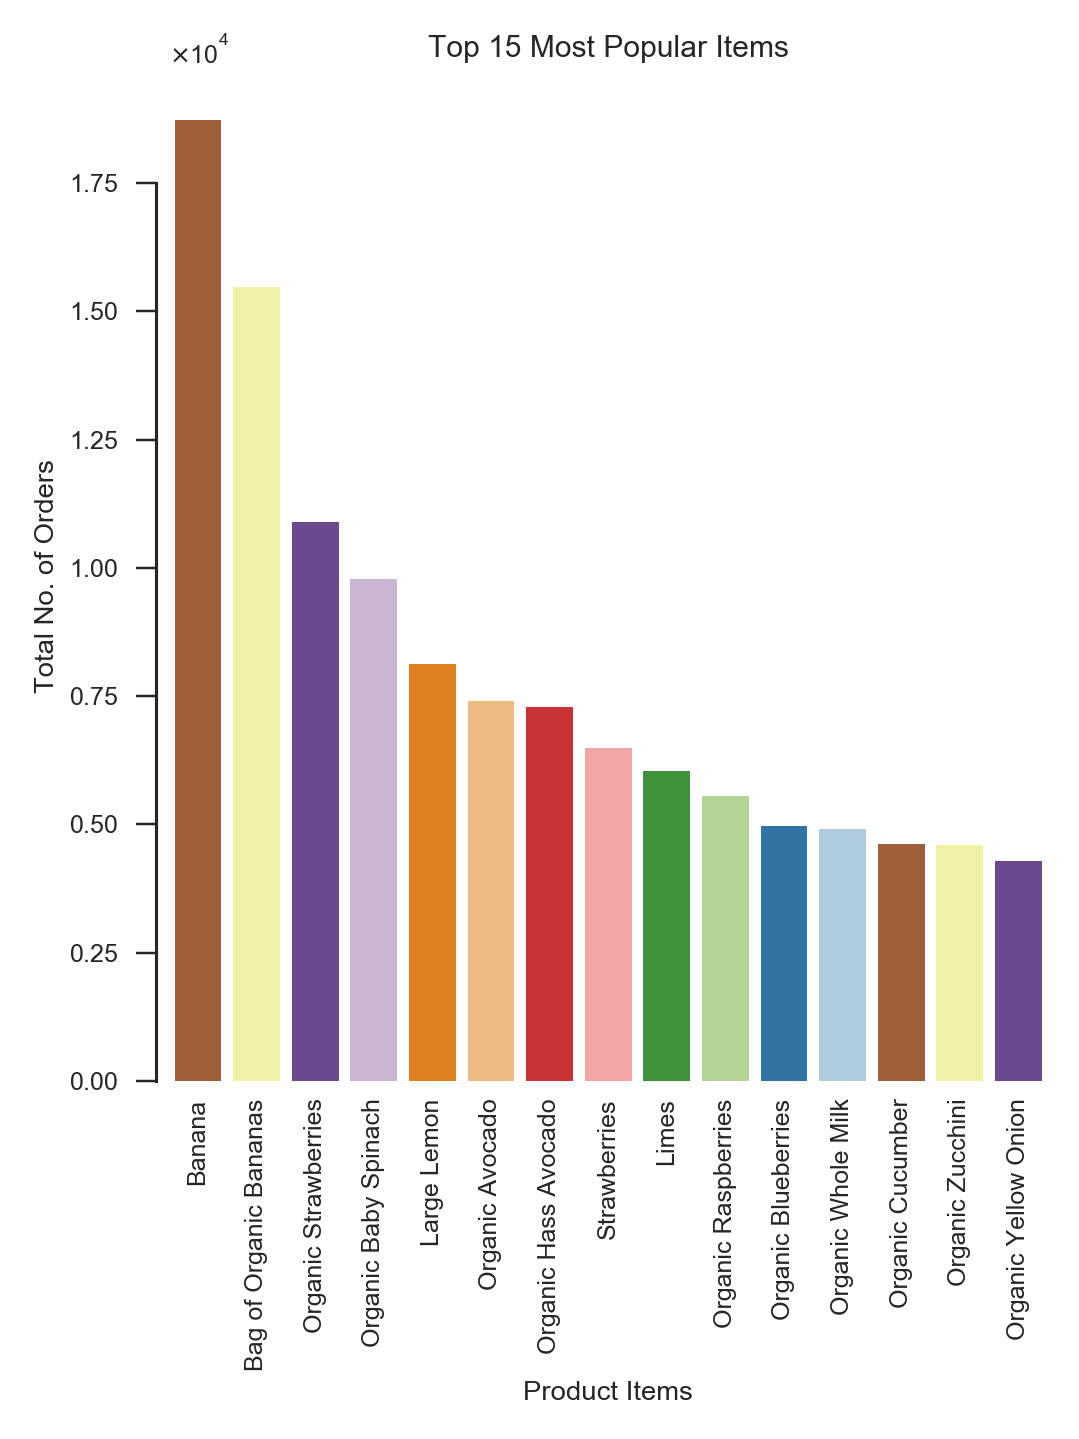

In [26]:
sns.set_style("white",{"xtick.major.size": 0,\
                       'ytick.major.size': 8,\
                       'axes.facecolor':"1"})
fig,ax=plt.subplots(figsize=(6,8))

sns.barplot(top15_product,hist_product.product_id.values[:15],\
              palette=cb.qualitative.Paired_12_r.mpl_colors,ax=ax)
sns.despine(ax=ax,top=True,bottom=True,trim=True,offset=5)
plt.title('Top 15 Most Popular Items')
plt.xlabel('Product Items')
plt.ylabel('Total No. of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Top 15 Most Popular Items.pdf',transparent=True)

In [ ]:
hist_product15

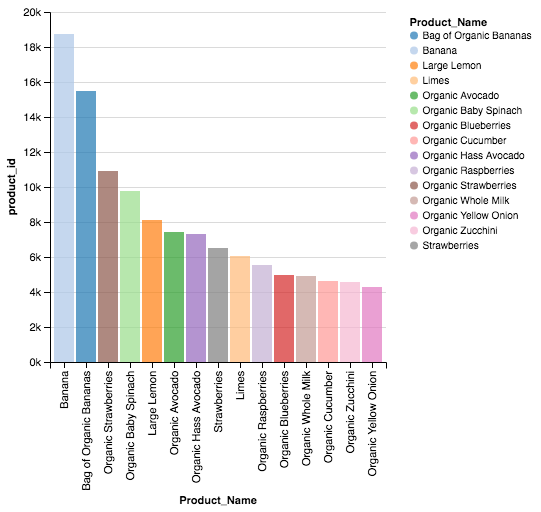

In [30]:
c=Chart(hist_product15).mark_bar().encode(
    Y('product_id'),
    X('Product_Name',sort=SortField(field='product_id', order='descending')),
    color=Color('Product_Name:N', scale=Scale(range=tb.Tableau_20.hex_colors))
)
c.display()
c.savechart('Top15.svg')


In [27]:
from IPython.display import display,SVG,Image

In [28]:
dept_dict=pd.Series(departments.department.values,index=departments.department_id).to_dict()

In [29]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [30]:
grouped=products.loc[:,['product_id','department_id']].groupby('department_id') 
#grouped

dept_pid=grouped.aggregate(lambda x : list(x))

dept_2_pid=list(dept_pid.product_id.values)

In [31]:
 def get_dept_id(product_id):
    j=21
    for i in np.arange(21):
        if product_id in dept_2_pid[i]:
            j=i
            break
    return j+1



In [32]:
get_dept_id(162)

1

## Most Popular Dept

In [52]:
order_products__prior.loc[:10,'product_id'].apply(lambda x: get_dept_id(x))

0     16
1      4
2     13
3     13
4     13
5      4
6     13
7     13
8      4
9     16
10    16
Name: product_id, dtype: int64

In [53]:
order_products__train['product_id'].shape

(1384617,)

In [54]:
order_products__train['dept_id']=order_products__train['product_id'].apply(lambda x: get_dept_id(x))

KeyboardInterrupt: 

In [ ]:
#order_products__prior['dept_id']=order_products__prior['product_id'].apply(lambda x: get_dept_id(x))

In [ ]:
order_products__prior.shape

In [ ]:
%timeit test['product_id'].apply(lambda x: get_dept_id(x))

In [41]:

test=pd.DataFrame(order_products__prior.loc[:10,'product_id'])
test['ans']=0
test.head()

,product_id,ans
0,33120,0
1,28985,0
2,9327,0
3,45918,0
4,30035,0


In [48]:
import numba

@numba.jit
def get_dept_id(product_id):
    j=21
    for i in np.arange(21):
        if product_id in dept_2_pid[i]:
            j=i
            break
    return j+1

@numba.jit
def apply_get_dept_id_numba(col_a):
   n = len(col_a)
   result = np.empty(n, dtype='int')
    
   for i in range(n):
      result[i] = get_dept_id(col_a[i])
   return result

def compute_numba(df):
   result = apply_get_dept_id_numba(df['product_id'].values)
   return pd.Series(result, index=df.index, name='result')


In [6]:
#compute_numba(order_products__train)

In [26]:
#order_products__train.to_csv('instacart_2017_05_01/order_products__train_w_dept_id.csv')

In [33]:
order_products__train=pd.read_csv(\
'instacart_2017_05_01/order_products__train_w_dept_id.csv',index_col=0)
order_products__train.head()

/Users/thein/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,order_id,product_id,add_to_cart_order,reordered,dept_id
0,1,49302,1,1,16
1,1,11109,2,1,16
2,1,10246,3,0,4
3,1,49683,4,0,4
4,1,43633,5,1,15


In [34]:
top_10_dept=pd.DataFrame(order_products__train_w_dept_id.dept_id.value_counts())
top_10_dept.columns=['Count']
top_10_dept.insert(0,'dept_id',top_10_dept.index)
top_10_dept.reset_index(inplace=True,drop=True)
top_10_dept=top_10_dept.iloc[:10,:]
top_10_dept['dept_id']=top_10_dept['dept_id'].apply(lambda x: dept_dict[x])
top_10_dept

,dept_id,Count
0,produce,409087
1,dairy eggs,217051
2,snacks,118862
3,beverages,114046
4,frozen,100426
5,pantry,81242
6,bakery,48394
7,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


<IPython.core.display.Javascript object>


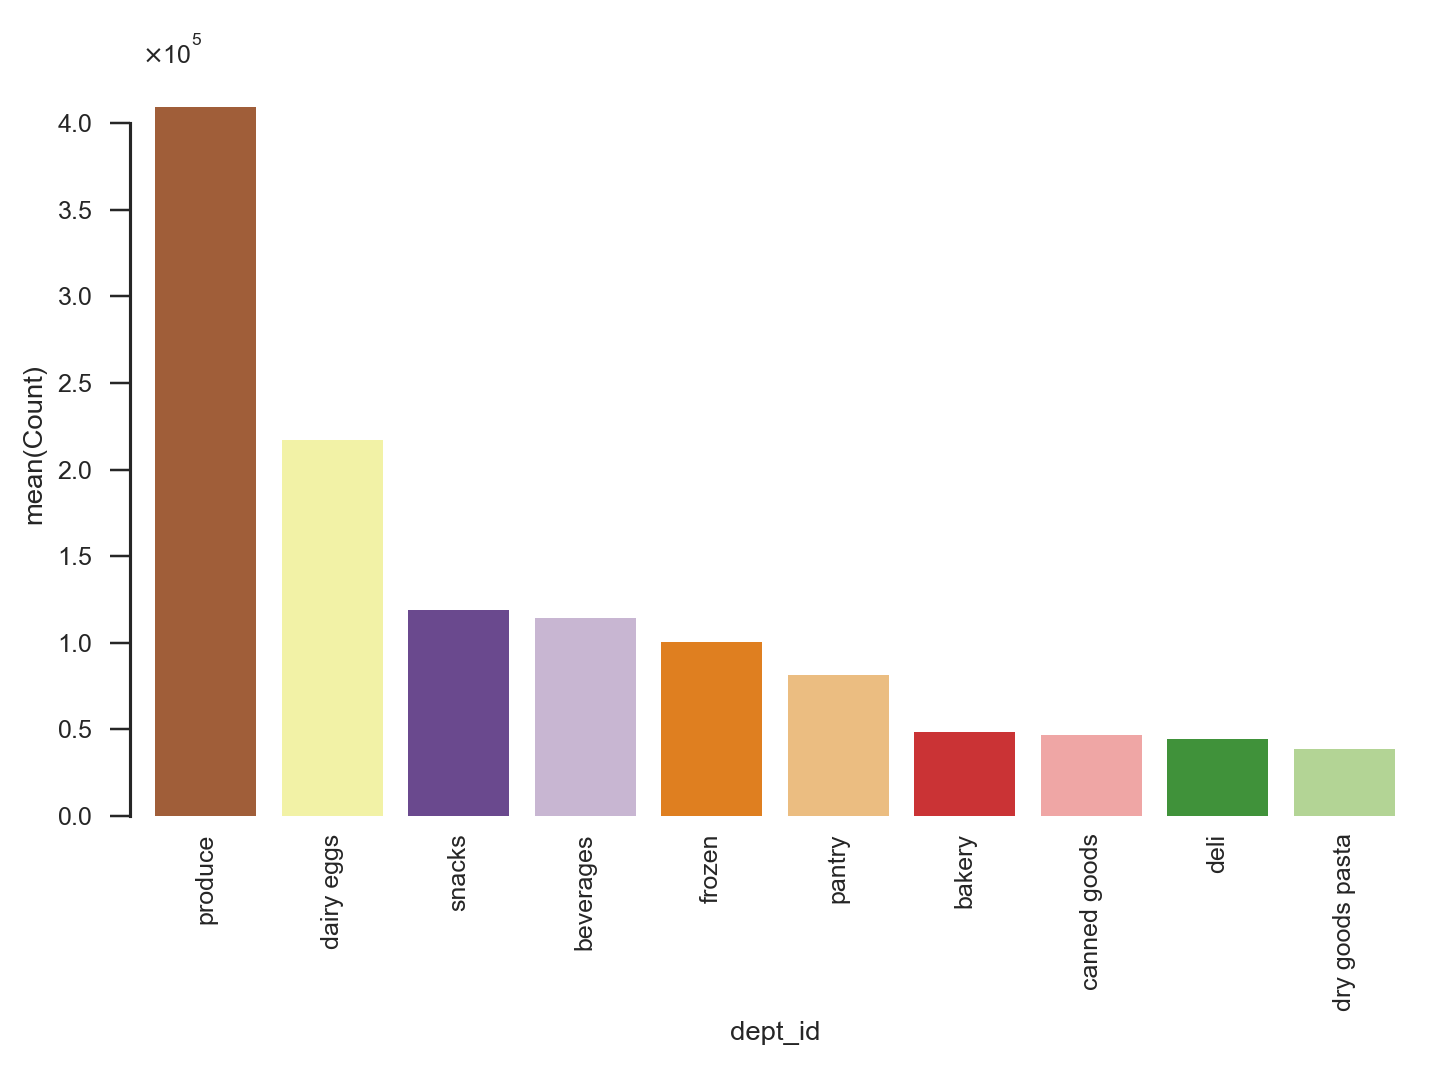

In [35]:

def sns_plot(x,y,filename):
    fig,ax=plt.subplots(figsize=(8,6))
    sns.barplot(x,y,palette=cb.qualitative.Paired_12_r.mpl_colors)
    plt.xticks(rotation=90)
    plt.tight_layout()
    sns.despine(ax=ax,top=True,bottom=True,trim=True,offset=5)
    plt.savefig(filename,transparent=True)

sns_plot(top_10_dept.dept_id,top_10_dept.Count,'Top 10 dept.pdf')

In [39]:
def top_plot(x,y,data,filename):
    c=Chart(data).mark_bar().encode(
        Y(y),
        X(x,sort=SortField(field='y', order='descending')),
        color=Color('{}:N'.format(x), scale=Scale(range=tb.Tableau_20.hex_colors))
    )
    c.display()
    c.savechart(filename)
    

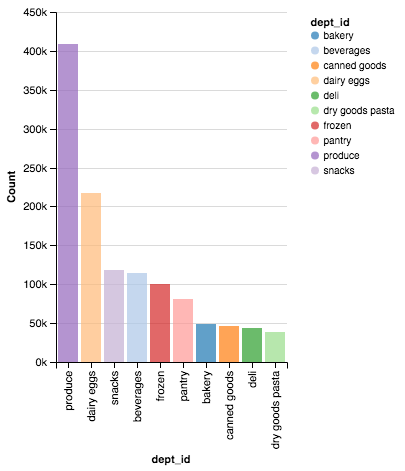

In [197]:
top_plot('dept_id','Count',top_10_dept,'top_10_dept.svg')

## Top 5 First added to Cart

In [40]:
add_to_cart_order_grouped =order_products__train.iloc[:,[0,1,2]].groupby('order_id')
add_to_cart_order_groupby=add_to_cart_order_grouped.aggregate(lambda x: list(x))
add_to_cart_order_groupby.head()

,product_id,add_to_cart_order
order_id,,
1,"[49302, 11109, 10246, 49683, 43633, 13176, 472...","[1, 2, 3, 4, 5, 6, 7, 8]"
36,"[39612, 19660, 49235, 43086, 46620, 34497, 486...","[1, 2, 3, 4, 5, 6, 7, 8]"
38,"[11913, 18159, 4461, 21616, 23622, 32433, 2884...","[1, 2, 3, 4, 5, 6, 7, 8, 9]"
96,"[20574, 30391, 40706, 25610, 27966, 24489, 39275]","[1, 2, 3, 4, 5, 6, 7]"
98,"[8859, 19731, 43654, 13176, 4357, 37664, 34065...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [41]:
def first_last(x):
    first3=[]
    last3=[]
    for i in x:
        first3.extend(i[:3])
        last3.extend(i[-3:])
    return first3,last3
    

In [42]:
first3,last3=first_last(add_to_cart_order_groupby.loc[:,'product_id'].values)

In [43]:
def return_count(x):
    xx = pd.DataFrame()
    unique,count=np.unique(x,return_counts=True)
    xx['Name']=unique
    xx['Count']=count
    
    return xx.sort_values(['Count'],ascending=False)

def get_product_name(x):
    return products[products.loc[:,'product_id'] == x]['product_name']\
.values[0]

In [44]:
first3_count_Top_10=return_count(first3).iloc[:10,:]
last3_count_Top_10=return_count(last3).iloc[:10,:]

In [45]:
first3_count_Top_10['Name']=first3_count_Top_10['Name'].\
apply(lambda x:get_product_name(x) )

In [46]:
last3_count_Top_10['Name']=last3_count_Top_10['Name'].\
apply(lambda x:get_product_name(x) )

In [47]:
last3_count_Top_10

,Name,Count
14752,Banana,3214
7765,Bag of Organic Bananas,2992
12532,Organic Strawberries,2690
12999,Organic Baby Spinach,2303
9941,Strawberries,1766
28302,Large Lemon,1712
23319,Organic Blueberries,1543
28383,Organic Avocado,1367
28043,Organic Hass Avocado,1310
15538,Limes,1308


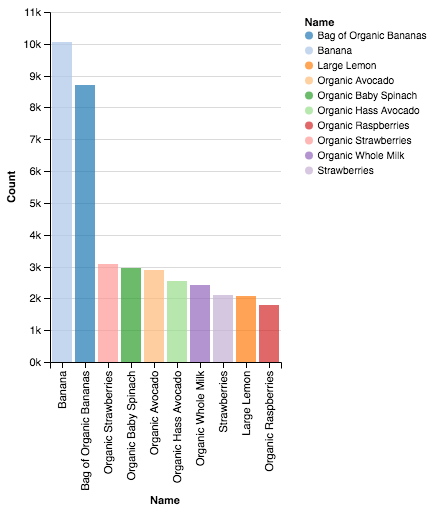

In [106]:
top_plot('Name','Count',first3_count_Top_10,'First3_Top10.svg')

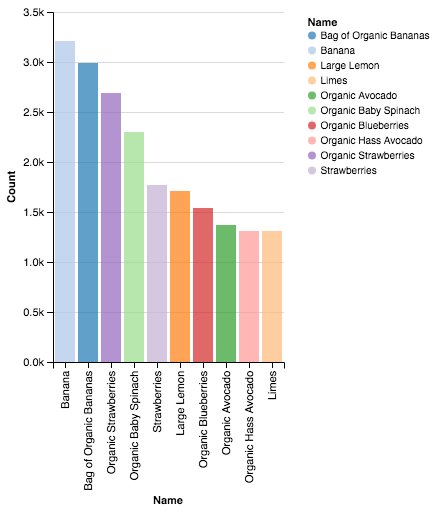

In [107]:
top_plot('Name','Count',last3_count_Top_10,'Last3_Top10.svg')

<IPython.core.display.Javascript object>


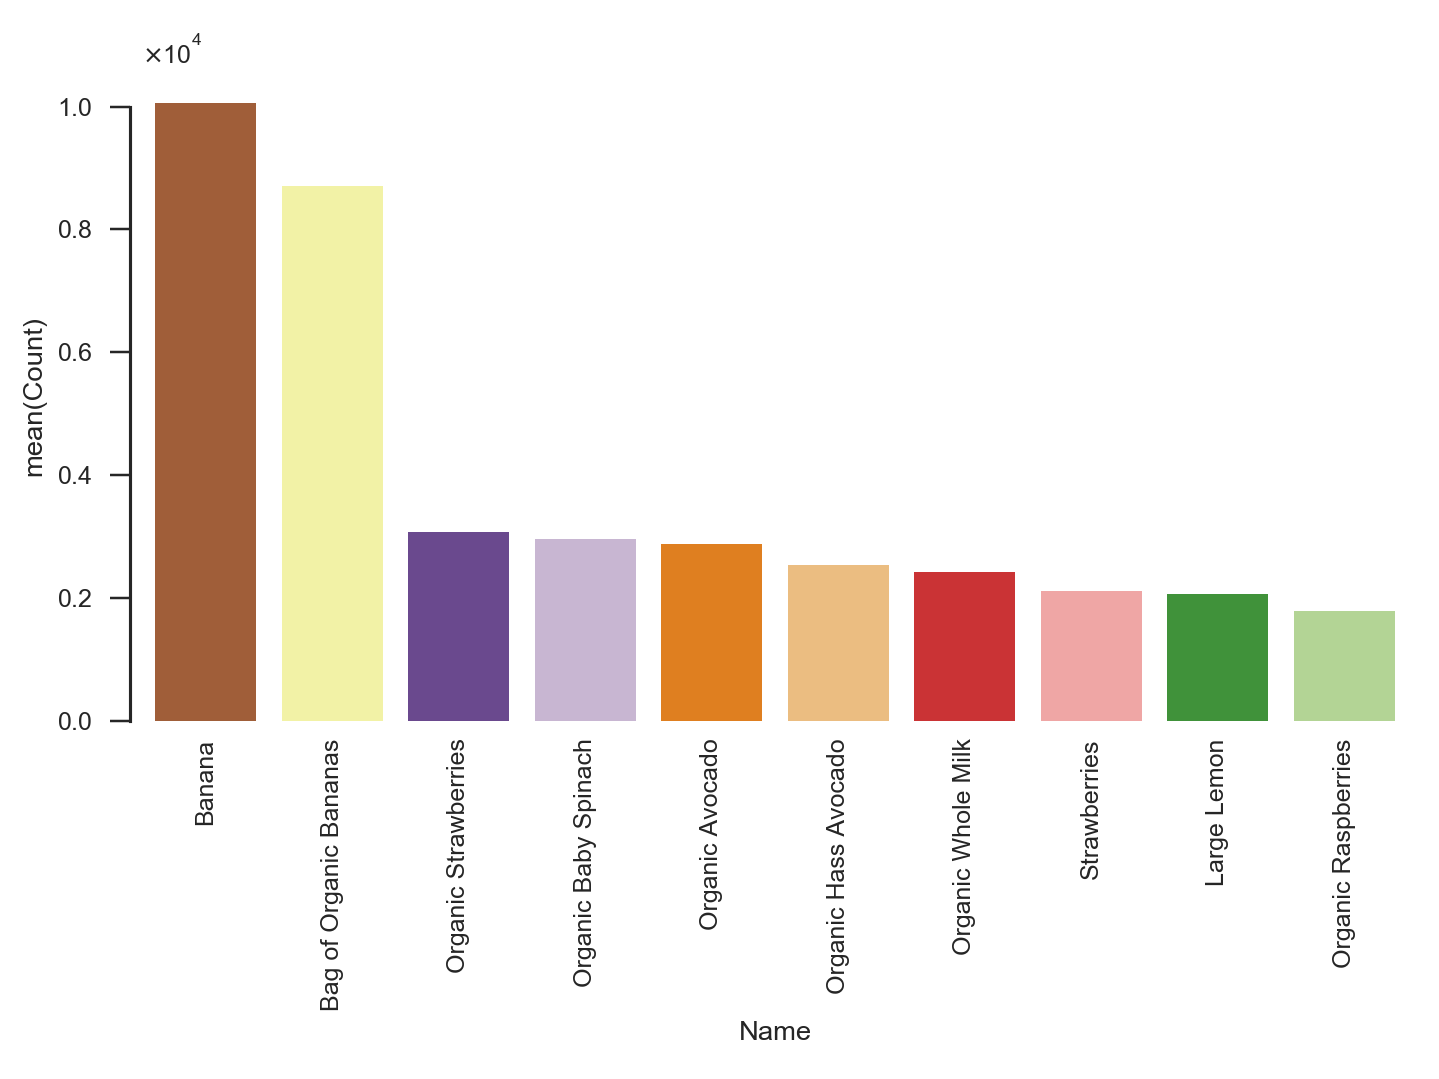

In [48]:
sns_plot(first3_count_Top_10.Name,first3_count_Top_10.Count,'First3_Top10.pdf')

<IPython.core.display.Javascript object>


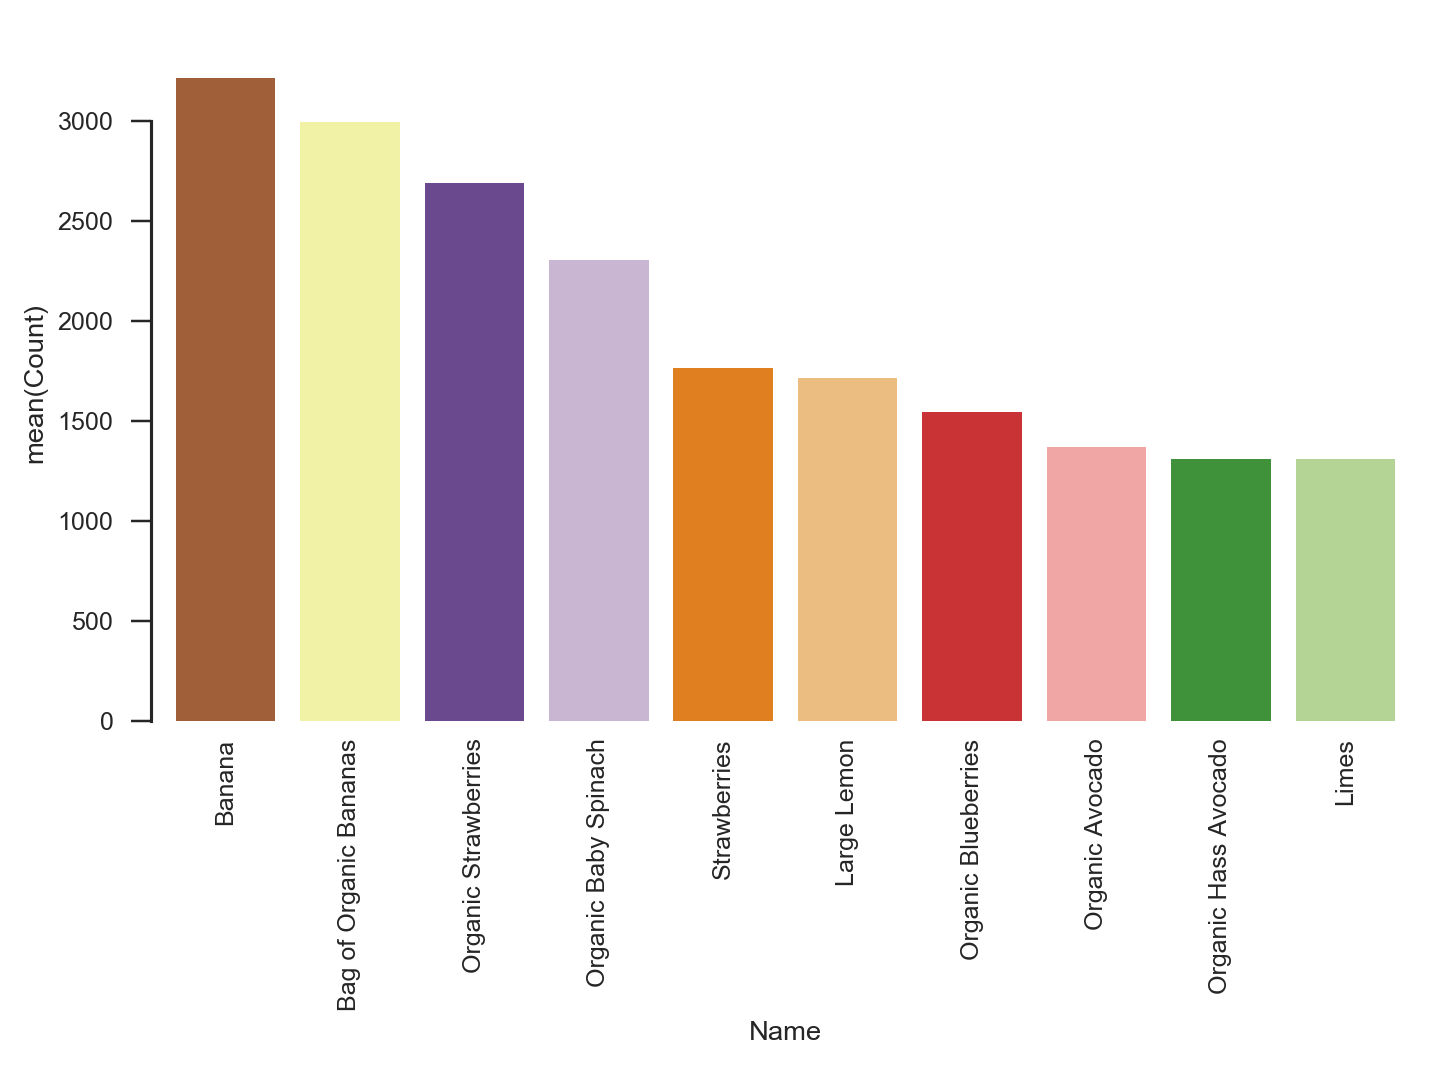

In [49]:
sns_plot(last3_count_Top_10.Name,last3_count_Top_10.Count,'Last3_Top10.pdf')

## Top 5 Last added to Cart

In [ ]:
test_pd=pd.DataFrame(list(map(first_last,add_to_cart_order_groupby.iloc[:2,0].values)),columns=['First','Last'])

#test_pd=list(map(first_last,add_to_cart_order_groupby.iloc[:2,0].values))
test_pd.head()

In [ ]:
import itertools
merged=list(itertools.chain(*test_pd.First.values))
merged

In [ ]:
add_to_cart_1st3_last3=pd.DataFrame()
add_to_cart_1st3_last3['order_id']=add_to_cart_order_groupby.index
add_to_cart_1st3_last3
add_to_cart_1st3_last3.head()

In [ ]:
order_products__train.iloc[:10,[0,1]]

In [ ]:
test_pd.First.values

In [20]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [22]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [23]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered,dept_id
0,1,49302,1,1,16
1,1,11109,2,1,16
2,1,10246,3,0,4
3,1,49683,4,0,4
4,1,43633,5,1,15


In [55]:
order_products__prior.shape[0]/1E6


32.434489

In [56]:
1E6

1000000.0

In [59]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [93]:
def test_fun(x=order_products__train.product_id.values[:1000]):
    list1=[]
    for i in x:
        list1.append(products[products['product_id'] ==i].department_id.values[0])
    return list1

In [83]:
@numba.jit
def apply_get_dept_id_numba(col_a):
   n = len(col_a)
   result = np.empty(n, dtype='int')
    
   for i in range(n):
      result[i] = products[products['product_id'] ==col_a[i]].department_id.values[0]
   return result

In [92]:
%timeit apply_get_dept_id_numba(order_products__train.product_id.values[:1000])

516 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
%timeit test_fun()

481 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [110]:
order_products__train_w_dept_id.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,dept_id
0,0,1,49302,1,1,16
1,1,1,11109,2,1,16
2,2,1,10246,3,0,4
3,3,1,49683,4,0,4
4,4,1,43633,5,1,15


In [50]:
day_since=get_hist(orders.days_since_prior_order)
bins=[0,7,15,22,30]
labels=['Week One','Week Two','Week Three','Week Four']
day_since['Name']=pd.cut(day_since['Name'],bins,labels=labels)

In [51]:
a=pd.DataFrame(day_since.groupby(['Name'])['days_since_prior_order'].sum())
a.reset_index(inplace=True)
a.columns=['Week_Of_Month','No_of_Total_Orders']
a.sort_values('No_of_Total_Orders',inplace=True,ascending=False)
a.reset_index(drop=True,inplace=True)
#sns_plot(a.iloc[:,0],a.iloc[:,1],'Week_of_Mont_prior_order.pdf')

In [56]:

def sns_plot1(x,y,filename,order1=None):
    fig,ax=plt.subplots(figsize=(8,6))
    sns.barplot(x,y,palette=cb.qualitative.Paired_12_r.mpl_colors,order=order1)
    plt.xticks(rotation=90)
    plt.tight_layout()
    sns.despine(ax=ax,top=True,bottom=True,trim=True,offset=5)
    plt.savefig(filename,transparent=True)

In [60]:
a.iloc[:,0].values

[Week One, Week Two, Week Four, Week Three]
Categories (4, object): [Week Four < Week One < Week Three < Week Two]

<IPython.core.display.Javascript object>


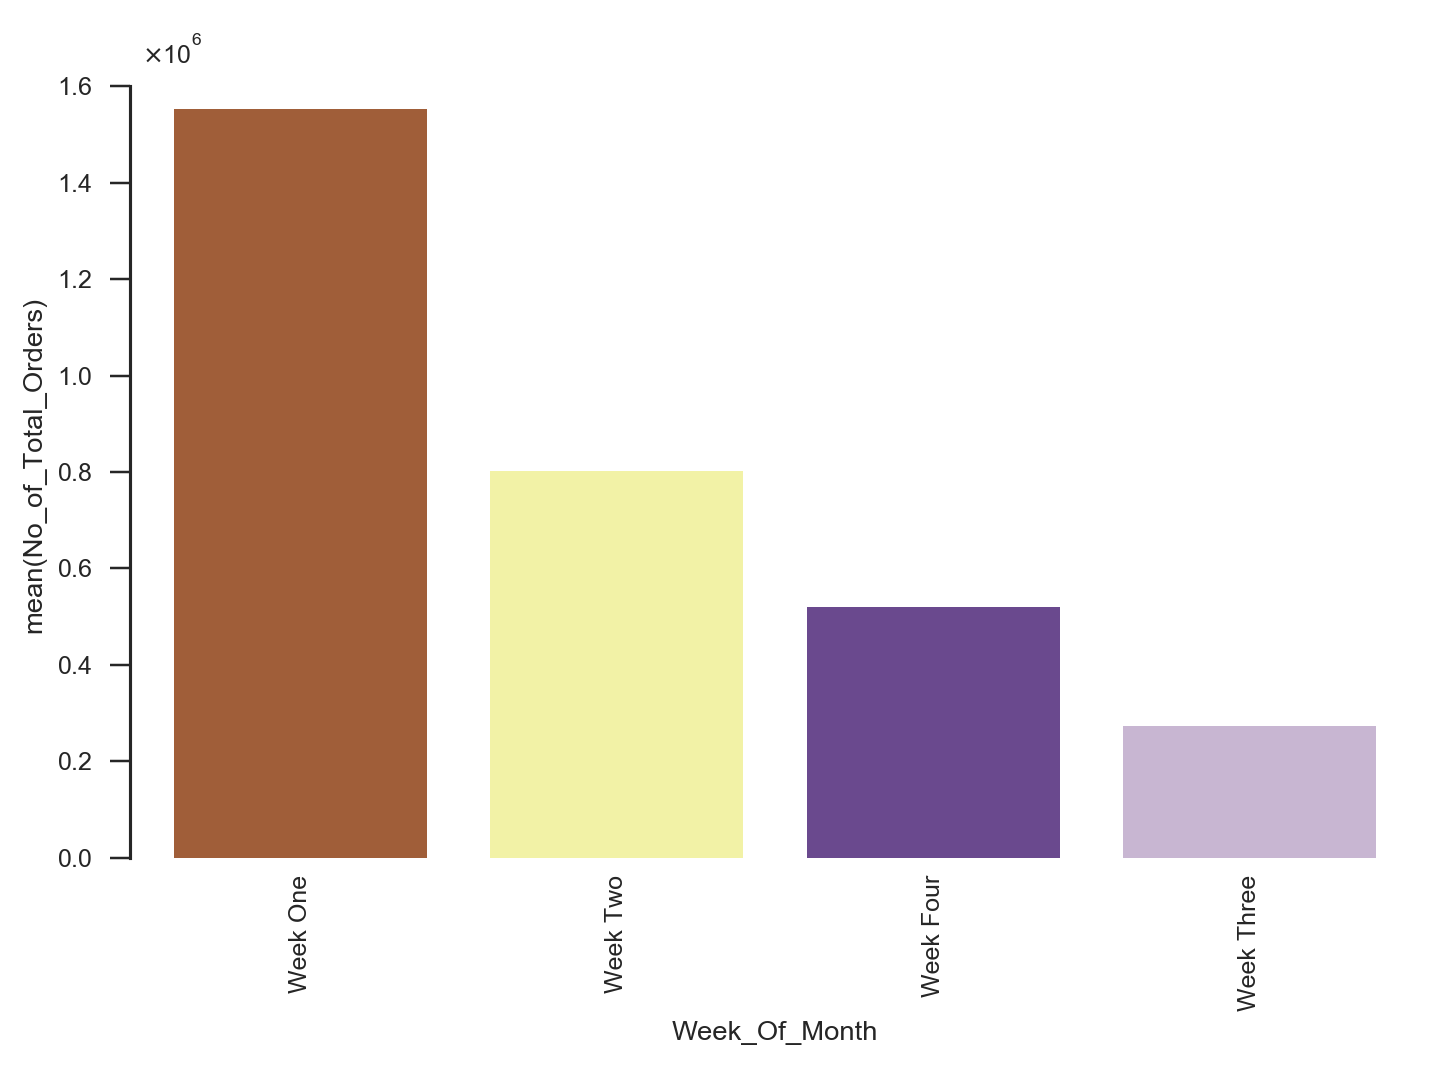

In [63]:
sns_plot1(a.iloc[:,0],a.iloc[:,1],'Week_of_Month_prior_order.pdf',\
          order1=a.iloc[:,0].values)

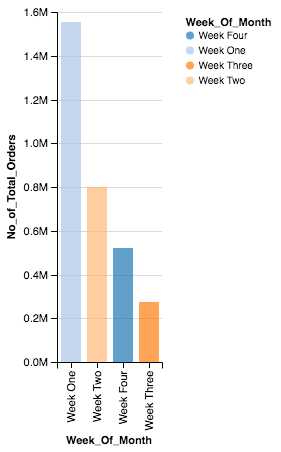

In [189]:
top_plot('Week_Of_Month','No_of_Total_Orders',a,'Day_prior_to.svg')

In [73]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered,dept_id
0,1,49302,1,1,16
1,1,11109,2,1,16
2,1,10246,3,0,4
3,1,49683,4,0,4
4,1,43633,5,1,15


In [94]:
len(order_products__train_prior )

33819106

In [95]:
order_products__train_prior.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,0,1,49302,1,1
1,1,1,11109,2,1
2,2,1,10246,3,0
3,3,1,49683,4,0
4,4,1,43633,5,1


In [83]:
hist_product.iloc[:2650,1].sum()/hist_product.iloc[:,1].sum()

0.6958877436865213

In [90]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [86]:
file_list

['aisles.csv',
 'departments.csv',
 'order_products__prior.csv',
 'order_products__train.csv',
 'orders.csv',
 'products.csv',
 'order_products__train_prior.csv',
 'product_hour_with_percent.csv',
 'order_products__train_w_dept_id.csv']

In [93]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
